Different X-ray devices by different manufacturers may provide different looking X-rays for the same patient. In medical AI industry, overfitting to the device pixel distributions is quite a big problem. 

Therefore, it is standard practice to apply some kind of contrast/brightness normalizations to minimize this problem.

Let's define generic x-ray reading function:

In [1]:
import numpy as np
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut

from skimage import exposure

import matplotlib.pyplot as plt
%matplotlib inline


def read_xray(path, voi_lut = True, fix_monochrome = True):
    dicom = pydicom.read_file(path)
    
    # VOI LUT (if available by DICOM device) is used to transform raw DICOM data to "human-friendly" view
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
               
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
    
    data = data - np.min(data)
        
    return data

### No normalization

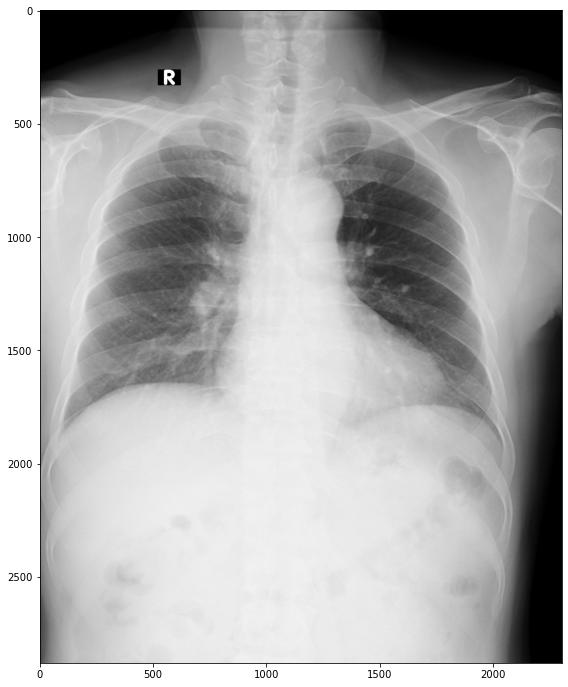

In [2]:
img = read_xray('../input/vinbigdata-chest-xray-abnormalities-detection/train/0108949daa13dc94634a7d650a05c0bb.dicom')
plt.figure(figsize = (12,12))
plt.imshow(img, 'gray')

### Histogram normalization

The general idea is to make pixel distribution uniform. This makes X-rays appear a little darker.
This generates view, which radiologist would not see in his standard workplace. 

Such normalization is used in popular open-source X-ray datasets, such as CheXpert.

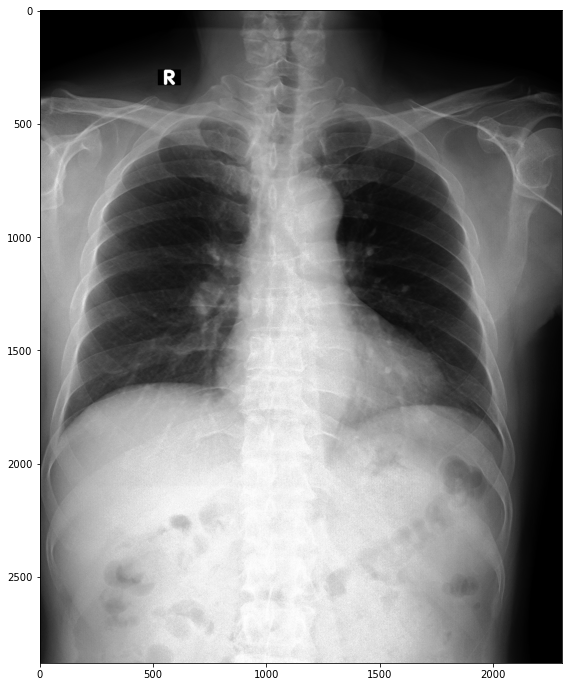

In [3]:
img = read_xray('../input/vinbigdata-chest-xray-abnormalities-detection/train/0108949daa13dc94634a7d650a05c0bb.dicom')
img = exposure.equalize_hist(img)
plt.figure(figsize = (12,12))
plt.imshow(img, 'gray')

### CLAHE normalization

This method produces sharper images and is quite often used in chest X-ray research. 
This generates view, which radiologist would not see in his standard workplace. However, it closely resembles the "bone-enhanced" view in some X-rays done (usually due to broken ribs).

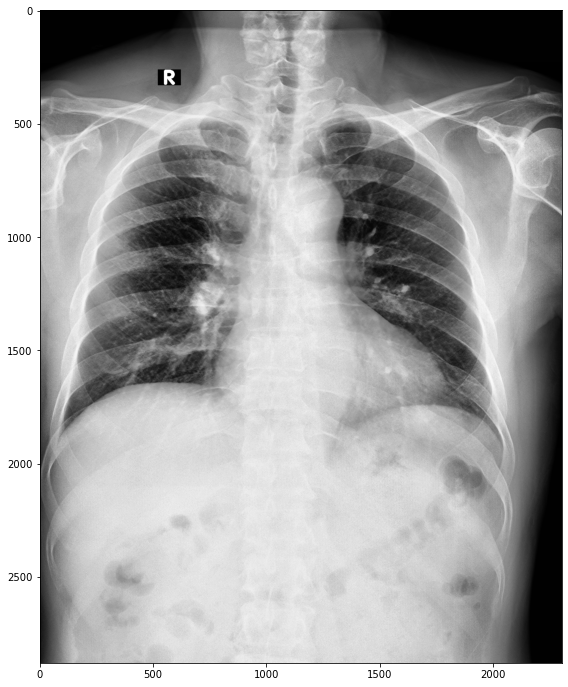

In [4]:
img = read_xray('../input/vinbigdata-chest-xray-abnormalities-detection/train/0108949daa13dc94634a7d650a05c0bb.dicom')
img = exposure.equalize_adapthist(img/np.max(img))
plt.figure(figsize = (12,12))
plt.imshow(img, 'gray')

### Summary

X-ray devices generate device-specific pixel distributions - which are easy to overfit to. Histogram normalization and CLAHE are good approaches to minimze this effect.